In [20]:
import os, random, shutil

food = ['steak', 'hamburger', 'french_fries', 'hot_dog', 'pizza']
folders = ['train', 'valid', 'test']

for j in folders:
    for i in food:
        mydir = 'food/' + j + '/' + i
        print(mydir)
        try:
            os.makedirs(mydir)
            break
        except:
            pass
    


food/train/steak
food/train/hamburger
food/train/french_fries
food/train/hot_dog
food/train/pizza
food/valid/steak
food/valid/hamburger
food/valid/french_fries
food/valid/hot_dog
food/valid/pizza
food/test/steak
food/test/hamburger
food/test/french_fries
food/test/hot_dog
food/test/pizza


In [38]:
#train
for i in food:
    for _ in range(600):
        dest = 'food/train/' + i
        src = 'food/' + i
        img = random.choice(os.listdir(src))
        shutil.move(src + '/' + img, dest)

#test
for i in food:
    for _ in range(100):
        dest = 'food/test/' + i
        src = 'food/' + i
        img = random.choice(os.listdir(src))
        shutil.move(src + '/' + img, dest)

#validation
for i in food:
    for _ in range(100):
        dest = 'food/valid/' + i
        src = 'food/' + i
        img = random.choice(os.listdir(src))
        shutil.move(src + '/' + img, dest)

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

In [35]:
train_path = 'food/train'
valid_path = 'food/valid'
test_path = 'food/test'
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['steak', 'hamburger', 'french_fries', 'hot_dog', 'pizza'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['steak', 'hamburger', 'french_fries', 'hot_dog', 'pizza'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['steak', 'hamburger', 'french_fries', 'hot_dog', 'pizza'], batch_size=10, shuffle=True)

Found 3000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [3]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
    
model.add(Dense(units=5, activation='softmax'))


In [6]:
modelDos = model
modelTres = model


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [8]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x=train_batches,
          steps_per_epoch=10,
          validation_data=valid_batches,
          validation_steps=5,
          epochs=30,
          verbose=1
)

Epoch 1/30
10/10 [==============================] - 53s 5s/step - loss: 1.2738 - acc: 0.4500 - val_loss: 1.6341 - val_acc: 0.3600
Epoch 2/30
10/10 [==============================] - 54s 5s/step - loss: 1.2722 - acc: 0.4700 - val_loss: 1.1617 - val_acc: 0.5400
Epoch 3/30
10/10 [==============================] - 58s 6s/step - loss: 0.9602 - acc: 0.6100 - val_loss: 1.3327 - val_acc: 0.4400
Epoch 4/30
10/10 [==============================] - 56s 6s/step - loss: 1.2948 - acc: 0.5700 - val_loss: 1.1180 - val_acc: 0.5000
Epoch 5/30
10/10 [==============================] - 55s 6s/step - loss: 1.2115 - acc: 0.4800 - val_loss: 1.1462 - val_acc: 0.5200
Epoch 6/30
10/10 [==============================] - 55s 6s/step - loss: 0.9735 - acc: 0.6400 - val_loss: 0.8761 - val_acc: 0.6800
Epoch 7/30
10/10 [==============================] - 56s 6s/step - loss: 1.0884 - acc: 0.5300 - val_loss: 0.9097 - val_acc: 0.6400
Epoch 8/30
10/10 [==============================] - 55s 6s/step - loss: 0.9104 - acc: 0.69

In [81]:
modelDos.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
modelDos.fit(x=train_batches,
          steps_per_epoch=5,
          validation_data=valid_batches,
          validation_steps=5,
          epochs=100,
          verbose=1
)

Epoch 1/100
5/5 [==============================] - 29s 6s/step - loss: 0.6567 - acc: 0.7200 - val_loss: 0.8438 - val_acc: 0.6000
Epoch 2/100
5/5 [==============================] - 30s 6s/step - loss: 0.9080 - acc: 0.7000 - val_loss: 0.6751 - val_acc: 0.8200
Epoch 3/100
5/5 [==============================] - 31s 6s/step - loss: 0.7424 - acc: 0.7800 - val_loss: 0.8900 - val_acc: 0.6200
Epoch 4/100
5/5 [==============================] - 30s 6s/step - loss: 0.4640 - acc: 0.8200 - val_loss: 0.5974 - val_acc: 0.8000
Epoch 5/100
5/5 [==============================] - 30s 6s/step - loss: 0.8160 - acc: 0.7000 - val_loss: 0.7068 - val_acc: 0.7400
Epoch 6/100
5/5 [==============================] - 30s 6s/step - loss: 0.6736 - acc: 0.7800 - val_loss: 0.8537 - val_acc: 0.6200
Epoch 7/100
5/5 [==============================] - 30s 6s/step - loss: 0.6906 - acc: 0.7400 - val_loss: 0.7736 - val_acc: 0.7200
Epoch 8/100
5/5 [==============================] - 29s 6s/step - loss: 0.7037 - acc: 0.6800 - val

5/5 [==============================] - 30s 6s/step - loss: 0.7150 - acc: 0.7600 - val_loss: 0.7813 - val_acc: 0.7400
Epoch 65/100
5/5 [==============================] - 30s 6s/step - loss: 0.4395 - acc: 0.8600 - val_loss: 0.4050 - val_acc: 0.8400
Epoch 66/100
5/5 [==============================] - 30s 6s/step - loss: 0.2901 - acc: 0.9000 - val_loss: 0.3990 - val_acc: 0.8200
Epoch 67/100
5/5 [==============================] - 30s 6s/step - loss: 0.3779 - acc: 0.9000 - val_loss: 0.4228 - val_acc: 0.8600
Epoch 68/100
5/5 [==============================] - 30s 6s/step - loss: 0.3153 - acc: 0.9000 - val_loss: 0.4535 - val_acc: 0.8600
Epoch 69/100
5/5 [==============================] - 30s 6s/step - loss: 0.3760 - acc: 0.8400 - val_loss: 0.8453 - val_acc: 0.7400
Epoch 70/100
5/5 [==============================] - 30s 6s/step - loss: 0.6396 - acc: 0.8000 - val_loss: 0.9678 - val_acc: 0.7000
Epoch 71/100
5/5 [==============================] - 30s 6s/step - loss: 0.5166 - acc: 0.8200 - val_loss

In [40]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

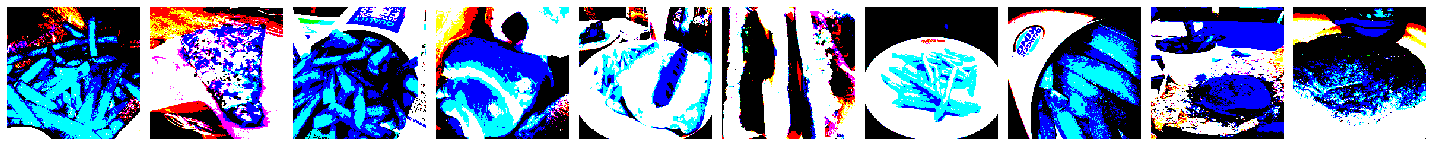

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [17]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

In [19]:
predictions = modelDos.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[86 10  0  2  2]
 [ 7 89  0  3  1]
 [ 1 13 60 26  0]
 [ 9 20  2 62  7]
 [ 8  2  0  6 84]]


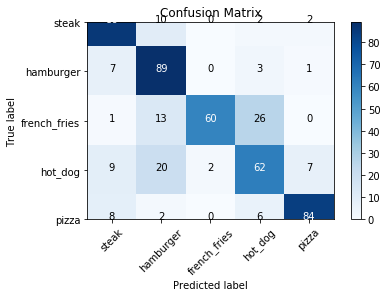

In [29]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['steak', 'hamburger', 'french_fries', 'hot_dog', 'pizza']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

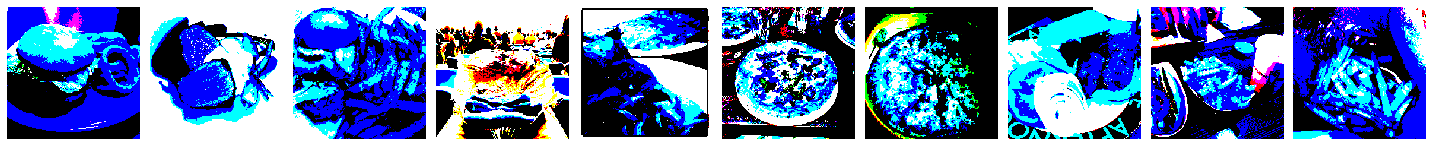

[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
['steak', 'hamburger', 'french_fries', 'hot_dog', 'pizza']


In [36]:
imgs, labels = next(test_batches)
plotImages(imgs)
print(labels)
print(['steak', 'hamburger', 'french_fries', 'hot_dog', 'pizza'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

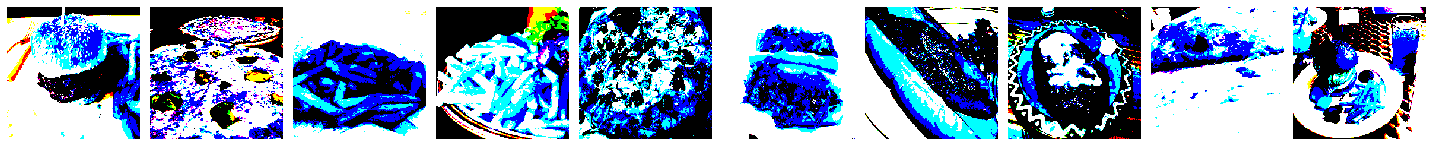

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]
['steak', 'hamburger', 'french_fries', 'hot_dog', 'pizza']


In [42]:
imgs, labels = next(test_batches)
plotImages(imgs)
print(labels)
print(['steak', 'hamburger', 'french_fries', 'hot_dog', 'pizza'])